<a href="https://colab.research.google.com/github/Saket22-CS/Saket-Infosys-Nov24/blob/main/FutureCart_Infosys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis and Data Preprocessing for Sales Data
## Project Overview
This project involves performing Exploratory Data Analysis (EDA) and data preprocessing on sales data. Our goal is to clean and prepare the data, identify trends and patterns, and gain insights through visualizations. This analysis will include handling missing values, identifying and treating outliers, and understanding correlations between different variables.

## Objectives:
- Ensure the sales data is in a time series format.
- Clean and format the data, addressing missing values and outliers.
- Visualize data distributions and trends over time.
- Identify relationships between variables through correlation analysis.
- Summarize the data with key statistical metrics.

## Key Steps in This Notebook:
1. Basic Data Checks
2. Handling Missing Values
3. Outlier Detection and Treatment (using 97th percentile)
4. Feature Engineering (time-based features)
5. Data Visualization (including distribution plots, time series plots, and pie charts)
6. Correlation Analysis
7. Statistical Summaries


In [ ]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization styles
plt.style.use('ggplot')
sns.set_palette('viridis')



## Basic Data Checks
Before starting any analysis, it's essential to conduct basic checks to understand the structure of the data and ensure it's suitable for further processing.


In [ ]:
# Loading the data from Excel files into DataFrames
sales_data = pd.read_excel('/content/ProductA.xlsx')  # Load sales data
google_clicks = pd.read_excel('/content/ProductA_google_clicks.xlsx')  # Load Google clicks data
fb_impressions = pd.read_excel('/content/ProductA_fb_impressions.xlsx')  # Load Facebook impressions data



In [ ]:
# Displaying basic information about the structure of each dataset
print("Sales Data Overview:")
sales_data.info()  # Shows data types, non-null counts, and memory usage


Sales Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  212 non-null    datetime64[ns]
 1   Quantity   212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [ ]:
print("\nGoogle Clicks Data Overview:")
google_clicks.info()  # Provides the same details for the Google clicks dataset



Google Clicks Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  212 non-null    datetime64[ns]
 1   Clicks     212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [ ]:
print("\nFacebook Impressions Data Overview:")
fb_impressions.info()  # Provides the same details for the Facebook impressions dataset



Facebook Impressions Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [ ]:
print("\nPreview of Sales Data:")
display(sales_data.head())  # Use `head()` to get a quick look at the first few rows of the dataset



Preview of Sales Data:


,Day Index,Quantity
0,2021-12-01,14
1,2021-12-02,10
2,2021-12-03,13
3,2021-12-04,22
4,2021-12-05,33


In [ ]:
# Checking the summary statistics of the sales data for any anomalies or data type issues
print("\nSales Data Summary:")
display(sales_data.describe())


Sales Data Summary:


,Day Index,Quantity
count,212,212.000000
mean,2022-03-16 12:00:00,17.542453
min,2021-12-01 00:00:00,5.000000
25%,2022-01-22 18:00:00,13.750000
50%,2022-03-16 12:00:00,17.000000
75%,2022-05-08 06:00:00,21.000000
max,2022-06-30 00:00:00,38.000000
std,NaN,5.790423


In [ ]:
# Merging datasets on the 'Date' column
merged_data = pd.merge(sales_data, google_clicks, on='Day Index', how='outer')
merged_data = pd.merge(merged_data, fb_impressions, on='Day Index', how='outer')

# Sorting by Date to ensure a time series format
merged_data.sort_values('Day Index', inplace=True)

# Displaying the merged dataset
print("Merged Data:")
display(merged_data.head())

Merged Data:


,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


In [ ]:
#info of dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Clicks       212 non-null    int64         
 3   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB


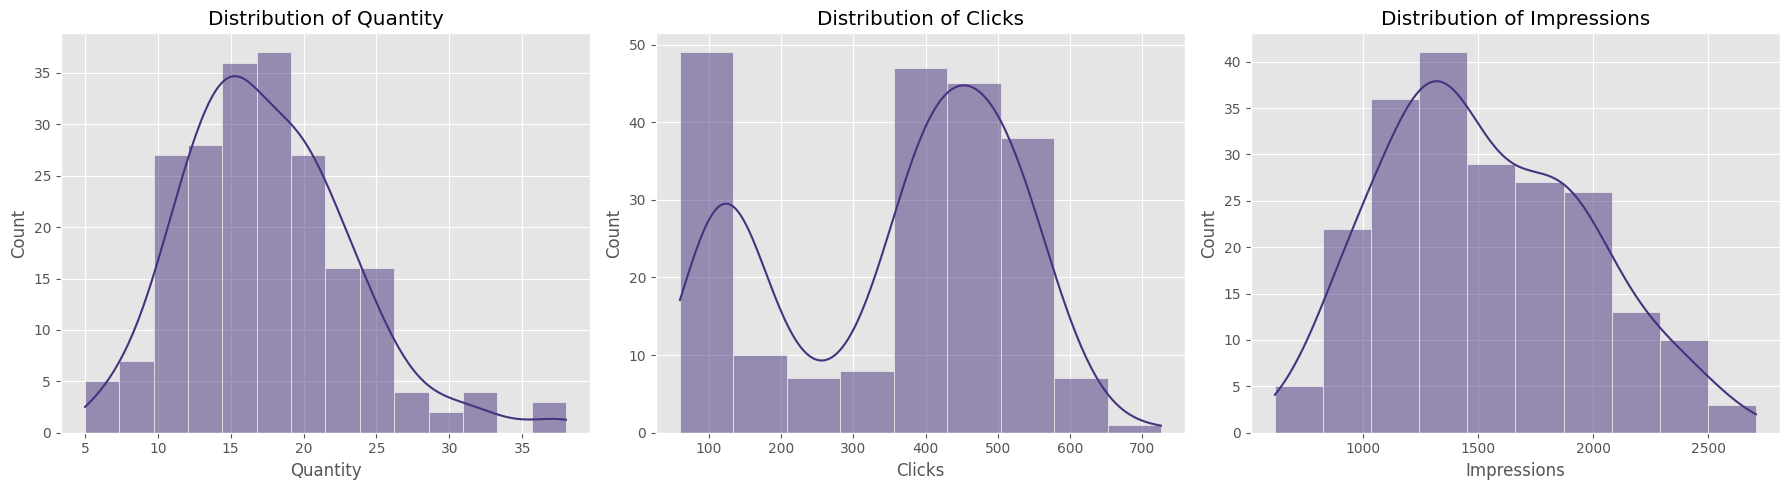

In [ ]:
# Plotting distribution plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(merged_data['Quantity'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Quantity')
axes[0].set_xlabel('Quantity')

sns.histplot(merged_data['Clicks'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Clicks')
axes[1].set_xlabel('Clicks')

sns.histplot(merged_data['Impressions'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Impressions')
axes[2].set_xlabel('Impressions')

plt.tight_layout()
plt.show()

### Explanation of Graphs:
- **Quantity Distribution**: Shows how sales quantities are spread and helps identify the most common sales values.
- **Clicks Distribution**: Highlights how many clicks are typically observed and the spread of data.
- **Impressions Distribution**: Indicates how often the product is shown in ads.


## Daily Trends of Quantity, Clicks, and Impressions
### Objective:
Visualizing daily trends for sales quantity, clicks, and impressions helps to understand how these metrics vary over time. This comparison can reveal potential correlations or patterns between user engagement (clicks and impressions) and sales performance (quantity).

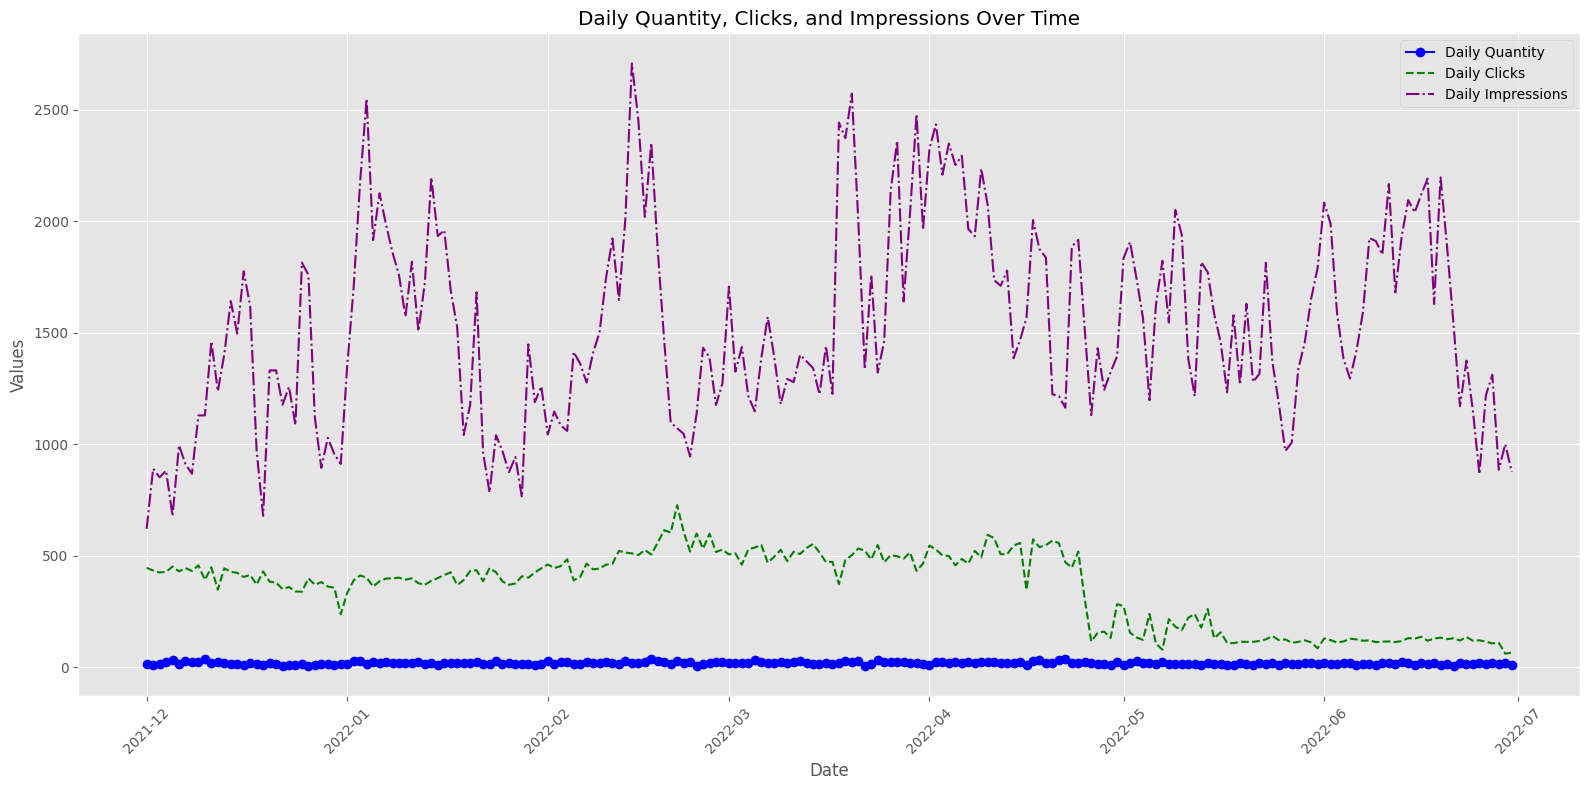

In [ ]:
# Plotting daily clicks, daily impressions, and daily quantity over time
plt.figure(figsize=(16, 8))

# Plot for daily quantity
plt.plot(merged_data['Day Index'], merged_data['Quantity'], label='Daily Quantity', marker='o', color='blue')

# Plot for daily clicks
plt.plot(merged_data['Day Index'], merged_data['Clicks'], label='Daily Clicks', linestyle='--', color='green')

# Plot for daily impressions
plt.plot(merged_data['Day Index'], merged_data['Impressions'], label='Daily Impressions', linestyle='-.', color='purple')

# Adding plot details
plt.title('Daily Quantity, Clicks, and Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

# Display the plot
plt.show()


### Explanation:
- **Daily Quantity**: Represents the number of products sold each day.
- **Daily Clicks**: Shows the number of user interactions (clicks) on the product each day, which can be a proxy for customer interest.
- **Daily Impressions**: Indicates how many times the product was displayed in ads or search results each day, providing insights into ad reach and visibility.


## Monthly Trends of Quantity, Clicks, and Impressions
### Objective:
Analyzing monthly aggregated trends for quantity, clicks, and impressions helps identify macro-level patterns and seasonal variations in user engagement and sales performance.


In [ ]:
# Ensure 'Date' is in datetime format before extracting 'Month'
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Adding the 'Month' column to the DataFrame
merged_data['Month'] = merged_data['Day Index'].dt.month

# Checking if the 'Month' column was added successfully
print("Preview of Merged Data with Month Column:")
display(merged_data.head())

Preview of Merged Data with Month Column:


,Day Index,Quantity,Clicks,Impressions,Month
0,2021-12-01,14,445,620,12
1,2021-12-02,10,433,890,12
2,2021-12-03,13,424,851,12
3,2021-12-04,22,427,881,12
4,2021-12-05,33,451,678,12


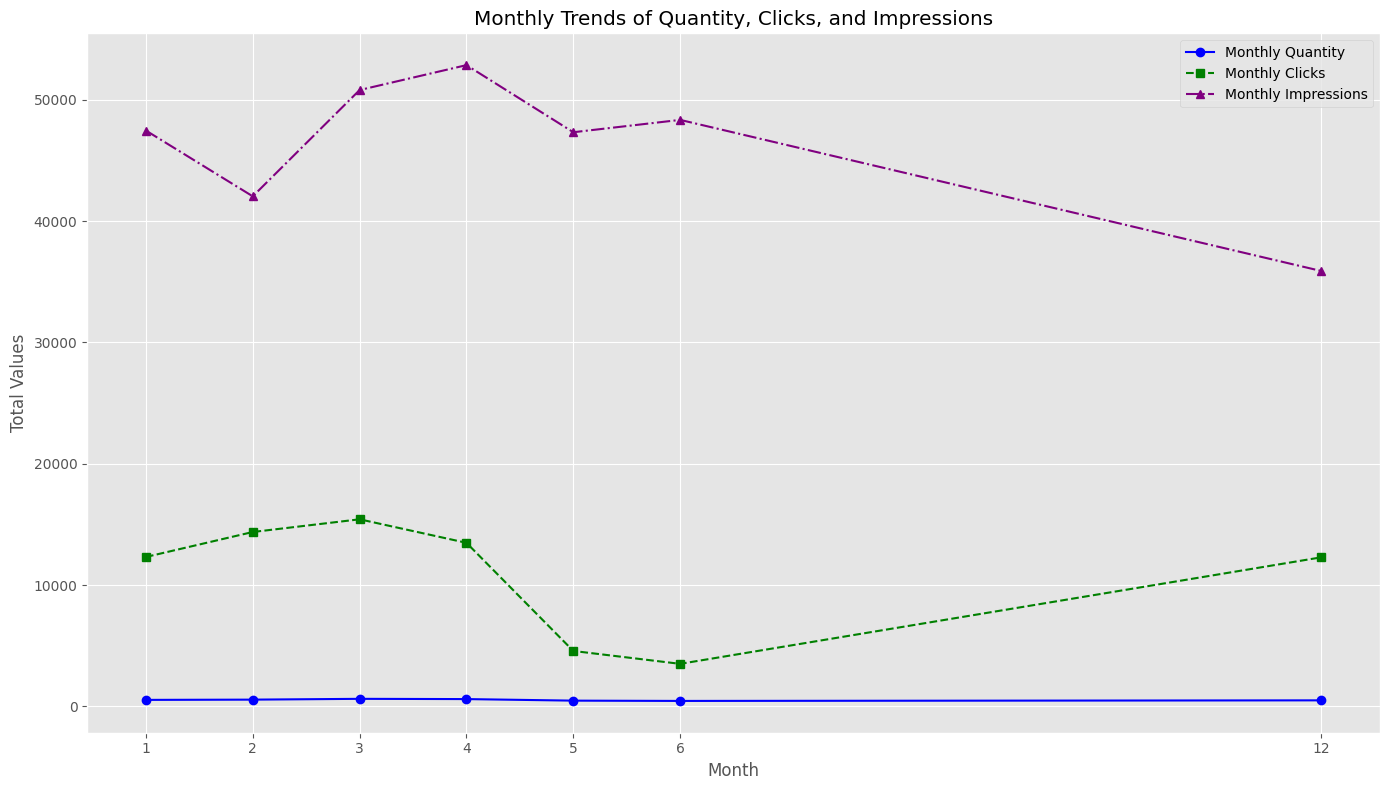

In [ ]:
# Ensure 'Month' column exists in the DataFrame
merged_data['Month'] = merged_data['Day Index'].dt.month

# Grouping data by 'Month' and summing only relevant numeric columns
monthly_data = merged_data.groupby('Month')[['Quantity', 'Clicks', 'Impressions']].sum()

# Plotting monthly quantity, clicks, and impressions
plt.figure(figsize=(14, 8))

# Plot for monthly quantity
plt.plot(monthly_data.index, monthly_data['Quantity'], label='Monthly Quantity', marker='o', color='blue')

# Plot for monthly clicks
plt.plot(monthly_data.index, monthly_data['Clicks'], label='Monthly Clicks', marker='s', linestyle='--', color='green')

# Plot for monthly impressions
plt.plot(monthly_data.index, monthly_data['Impressions'], label='Monthly Impressions', marker='^', linestyle='-.', color='purple')

# Adding plot details
plt.title('Monthly Trends of Quantity, Clicks, and Impressions')
plt.xlabel('Month')
plt.ylabel('Total Values')
plt.legend()
plt.xticks(monthly_data.index)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


### Explanation:
- **Monthly Quantity**: Summarizes the total number of products sold each month, providing insights into sales cycles and peak periods.
- **Monthly Clicks**: Shows the total user interactions (clicks) per month, helping assess customer interest trends over time.
- **Monthly Impressions**: Represents the total number of times the product was displayed in ads or search results per month, indicating ad reach and effectiveness.


## Handling Missing Values
Missing values can skew results and lead to biased analyses. We'll identify and handle missing values using appropriate imputation techniques.


In [ ]:
# Checking for missing values in the datasets
print("\nMissing Values in Sales Data:")
print(sales_data.isnull().sum())
print("\nMissing Values in Google Clicks Data:")
print(google_clicks.isnull().sum())
print("\nMissing Values in Facebook Impressions Data:")
print(fb_impressions.isnull().sum())

# Handling missing values by filling them with the mean of their respective columns
sales_data.fillna(sales_data.mean(), inplace=True)
google_clicks.fillna(google_clicks.mean(), inplace=True)
fb_impressions.fillna(fb_impressions.mean(), inplace=True)



Missing Values in Sales Data:
Day Index    0
Quantity     0
dtype: int64

Missing Values in Google Clicks Data:
Day Index    0
Clicks       0
dtype: int64

Missing Values in Facebook Impressions Data:
Day Index      0
Impressions    0
dtype: int64


## Box Plots for Clicks, Quantity, and Impressions Data
### Objective:
Box plots are used to visualize the distribution of data, detect outliers, and understand the spread and skewness of the dataset. This helps identify variability and potential anomalies in the data.


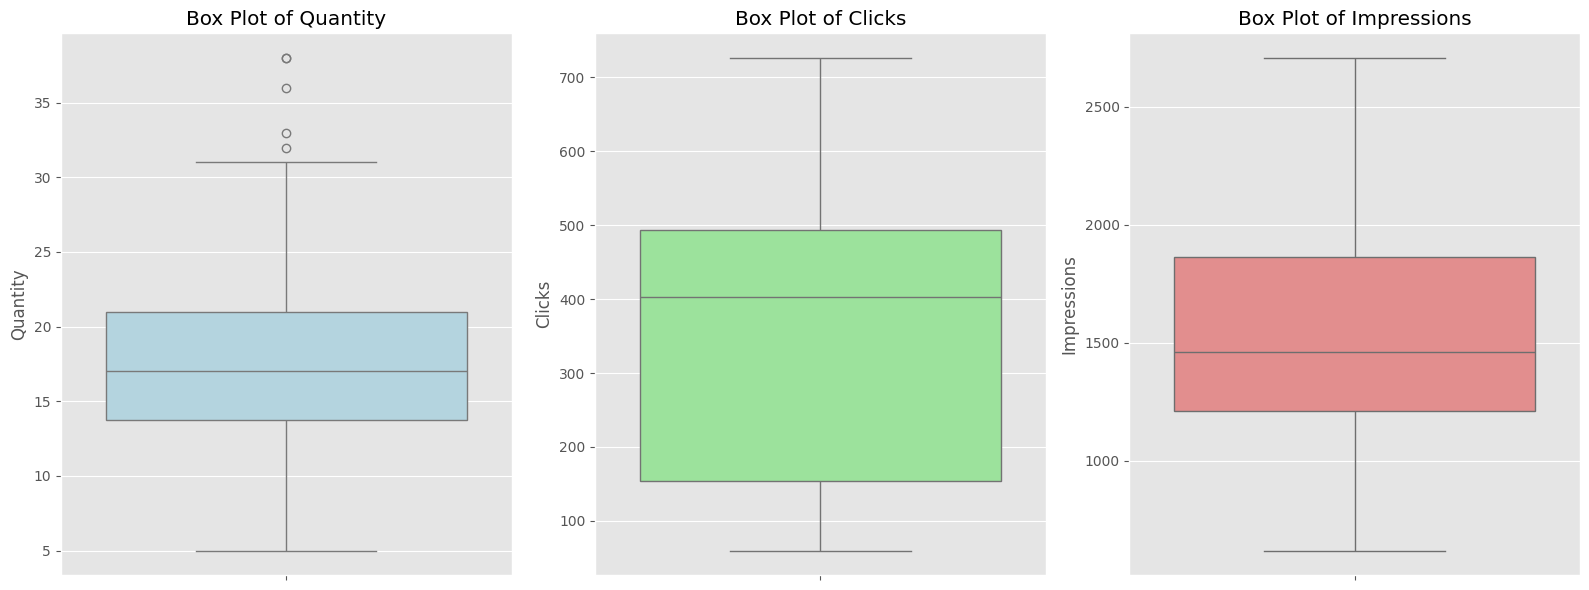

In [ ]:
# Setting up the figure size for box plots
plt.figure(figsize=(16, 6))

# Plotting box plot for Quantity data
plt.subplot(1, 3, 1)
sns.boxplot(data=merged_data, y='Quantity', color='lightblue')
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')

# Plotting box plot for Clicks data
plt.subplot(1, 3, 2)
sns.boxplot(data=merged_data, y='Clicks', color='lightgreen')
plt.title('Box Plot of Clicks')
plt.ylabel('Clicks')

# Plotting box plot for Impressions data
plt.subplot(1, 3, 3)
sns.boxplot(data=merged_data, y='Impressions', color='lightcoral')
plt.title('Box Plot of Impressions')
plt.ylabel('Impressions')

# Adjusting layout
plt.tight_layout()
plt.show()



### Explanation:
- **Quantity Box Plot**: Visualizes the distribution of sales quantity data, highlighting the median, quartiles, and outliers.
- **Clicks Box Plot**: Shows how user interaction data (clicks) is spread and identifies any extreme values.
- **Impressions Box Plot**: Illustrates the distribution of the number of times the product was shown in ads, along with potential outliers.


##  Outlier Detection and Treatment
Outliers can distort the analysis. We use the interquartile range (IQR) method to detect outliers and replace them with the 97th percentile value.


In [ ]:
# Function to count the number of outliers in a column using the Interquartile Range (IQR) method
def count_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1               # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers below the lower bound or above the upper bound
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Selecting numeric columns for outlier analysis in the merged data
numeric_columns = merged_data[['Quantity', 'Clicks', 'Impressions']]
outlier_counts = numeric_columns.apply(count_outliers)

# Displaying the number of outliers in each column
print("Number of outliers in each column:")
print(outlier_counts)


Number of outliers in each column:
Quantity       5
Clicks         0
Impressions    0
dtype: int64


In [ ]:
# Function to detect outliers and return the records
def get_outlier_records(column, data):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1               # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify rows where the value is an outlier
    return data[(column < lower_bound) | (column > upper_bound)]

# Selecting numeric columns for outlier detection
numeric_columns = ['Quantity', 'Clicks', 'Impressions']
outlier_records = {}

# Collecting outlier records for each numeric column
for col in numeric_columns:
    outlier_records[col] = get_outlier_records(merged_data[col], merged_data)

# Displaying the outlier records for each column
for col, records in outlier_records.items():
    print(f"Outliers in column '{col}':")
    print(records)
    print("\n")


Outliers in column 'Quantity':
     Day Index  Quantity  Clicks  Impressions  Month
4   2021-12-05        33     451          678     12
9   2021-12-10        38     391         1129     12
78  2022-02-17        38     505         2351      2
113 2022-03-24        32     547         1321      3
142 2022-04-22        36     470         1163      4


Outliers in column 'Clicks':
Empty DataFrame
Columns: [Day Index, Quantity, Clicks, Impressions, Month]
Index: []


Outliers in column 'Impressions':
Empty DataFrame
Columns: [Day Index, Quantity, Clicks, Impressions, Month]
Index: []




In [ ]:
# Function to replace outliers using the 25th and 97th percentiles
def replace_outliers_with_percentiles(column):
    q25 = np.percentile(column, 25)  # 25th percentile
    q75 = np.percentile(column, 75)  # 75th percentile
    q97 = np.percentile(column, 97)  # 97th percentile

    # Define IQR and bounds for outlier detection
    IQR = q75 - q25
    lower_bound = q25 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = q75 + 1.5 * IQR  # Upper bound for outliers

    # Replace outliers above the upper bound with the 97th percentile value
    column = column.apply(lambda x: q97 if x > upper_bound else x)
    # Replace outliers below the lower bound with the 25th percentile value
    column = column.apply(lambda x: q25 if x < lower_bound else x)

    return column

# Applying the function to 'Quantity', 'Clicks', and 'Impressions' columns in merged_data
merged_data['Quantity'] = replace_outliers_with_percentiles(merged_data['Quantity'])
merged_data['Clicks'] = replace_outliers_with_percentiles(merged_data['Clicks'])
merged_data['Impressions'] = replace_outliers_with_percentiles(merged_data['Impressions'])

# Displaying a preview of the updated DataFrame
print("Updated Merged DataFrame preview after outlier treatment:")
print(merged_data.head())


Updated Merged DataFrame preview after outlier treatment:
   Day Index  Quantity  Clicks  Impressions  Month
0 2021-12-01     14.00     445          620     12
1 2021-12-02     10.00     433          890     12
2 2021-12-03     13.00     424          851     12
3 2021-12-04     22.00     427          881     12
4 2021-12-05     30.67     451          678     12


In [ ]:
# Function to replace outliers using 25th and 97th percentiles
def replace_outliers(column):
    q25 = np.percentile(column, 25)  # 25th percentile
    q75 = np.percentile(column, 75)  # 75th percentile
    q97 = np.percentile(column, 97)  # 97th percentile

    # Define the lower and upper bounds for outliers
    lower_bound = q25
    upper_bound = q75

    # Replace values above the 97th percentile with the 97th percentile value
    column = column.apply(lambda x: q97 if x > upper_bound else x)
    # Replace values below the 25th percentile with the 25th percentile value
    column = column.apply(lambda x: q25 if x < lower_bound else x)

    return column

# Applying the outlier replacement function to relevant columns
merged_data['Quantity'] = replace_outliers(merged_data['Quantity'])
merged_data['Clicks'] = replace_outliers(merged_data['Clicks'])
merged_data['Impressions'] = replace_outliers(merged_data['Impressions'])

# Check the updated DataFrame
print("Updated DataFrame preview after outlier treatment:")
print(merged_data.head())


Updated DataFrame preview after outlier treatment:
   Day Index  Quantity  Clicks  Impressions  Month
0 2021-12-01   14.0000   445.0      1209.75     12
1 2021-12-02   13.7500   433.0      1209.75     12
2 2021-12-03   13.7500   424.0      1209.75     12
3 2021-12-04   30.4489   427.0      1209.75     12
4 2021-12-05   30.4489   451.0      1209.75     12


## Histograms Before and After Outlier Treatment
### Objective:
Visualizing histograms before and after outlier treatment helps us understand the impact of outliers on the data distribution and how the treatment has adjusted the data.


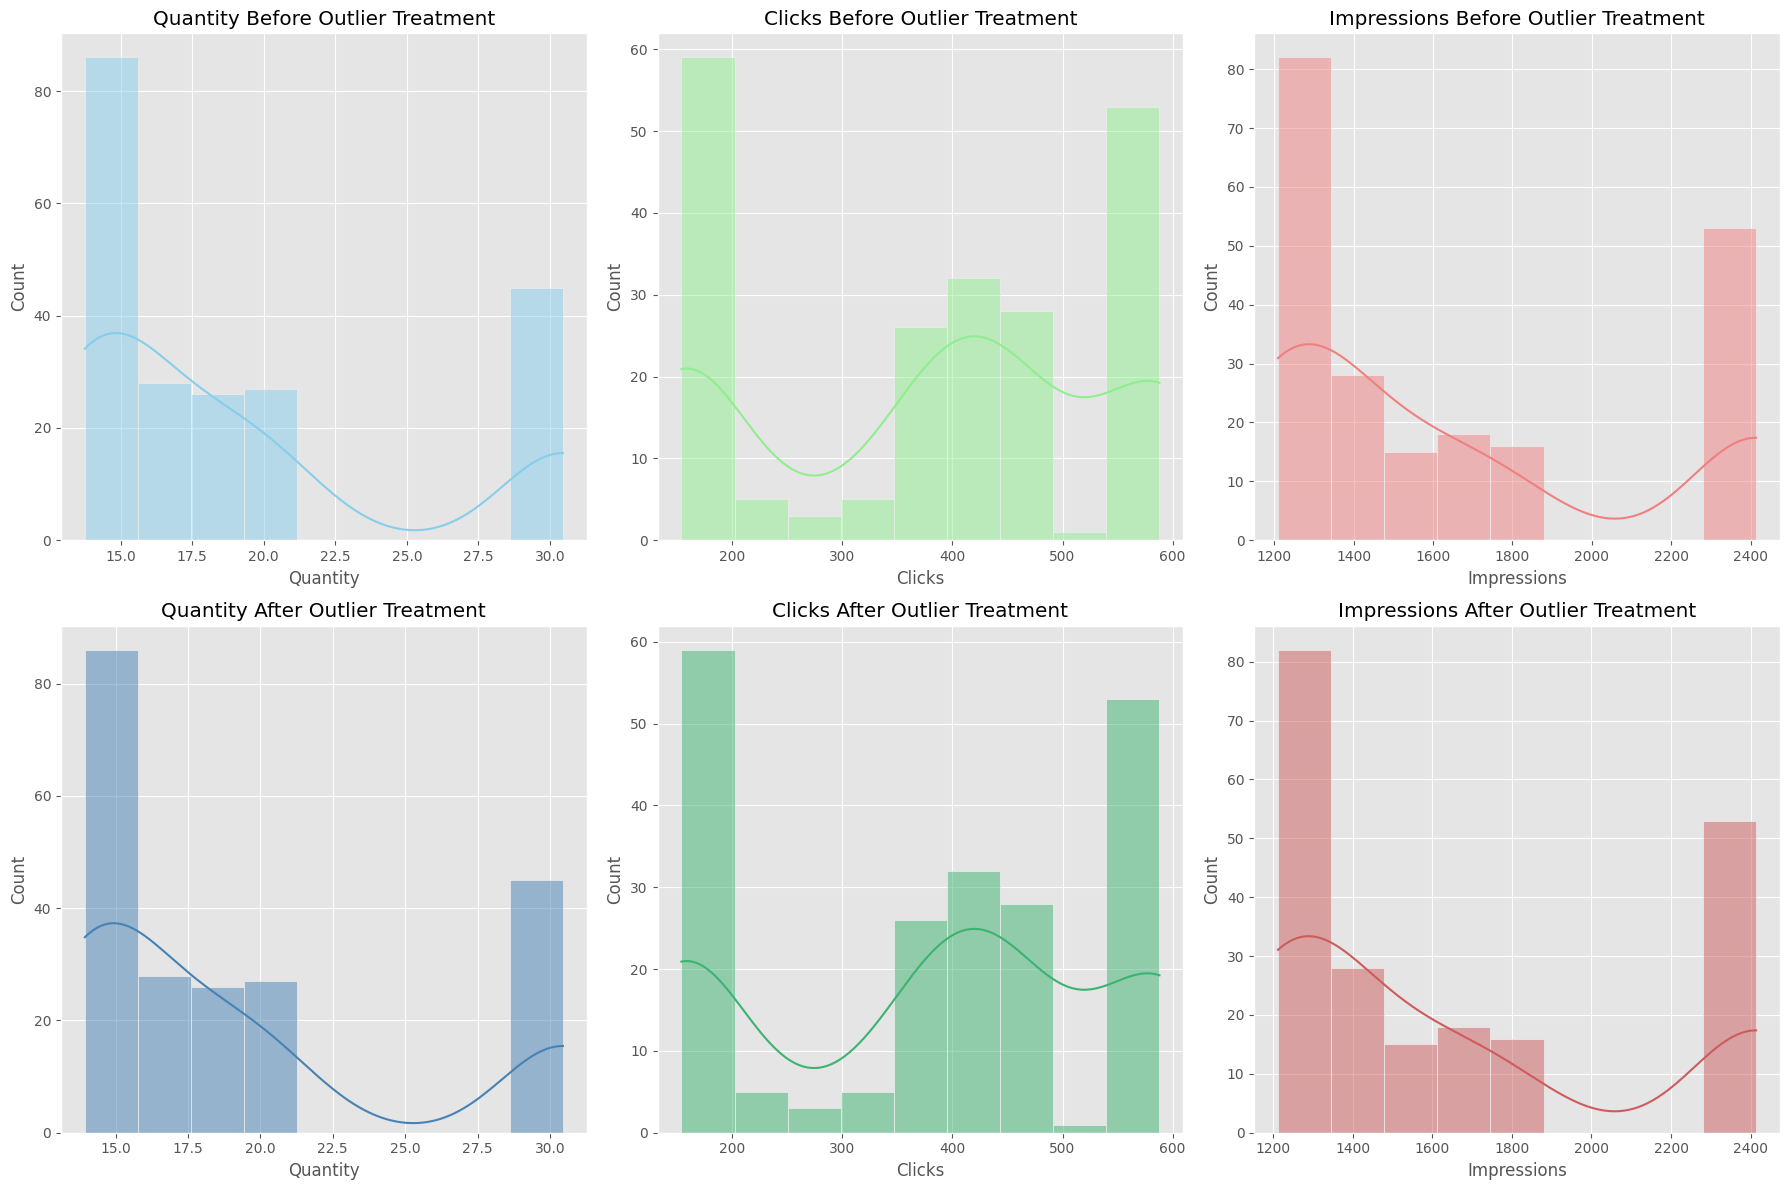

Before Outlier Treatment:
         Quantity      Clicks  Impressions
count  212.000000  212.000000   212.000000
mean    19.216748  379.913443  1654.883821
std      6.263689  164.497684   474.586786
min     13.750000  154.000000  1209.750000
25%     13.937500  154.000000  1212.937500
50%     17.000000  402.500000  1460.000000
75%     21.000000  516.012500  1997.635000
max     30.448900  588.050000  2413.540000

After Outlier Treatment:
         Quantity      Clicks  Impressions
count  212.000000  212.000000   212.000000
mean    19.263623  379.913443  1655.680696
std      6.222981  164.497684   473.837248
min     13.937500  154.000000  1212.937500
25%     13.984375  154.000000  1213.734375
50%     17.000000  402.500000  1460.000000
75%     21.000000  516.012500  1997.635000
max     30.448900  588.050000  2413.540000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create copies of the original data for comparison
original_data = merged_data.copy()

# Outlier treatment function
def replace_outliers(column):
    q25 = np.percentile(column, 25)  # 25th percentile
    q75 = np.percentile(column, 75)  # 75th percentile
    q97 = np.percentile(column, 97)  # 97th percentile
    lower_bound = q25
    upper_bound = q75
    # Apply outlier treatment
    column = column.apply(lambda x: q97 if x > upper_bound else x)
    column = column.apply(lambda x: q25 if x < lower_bound else x)
    return column

# Apply the outlier treatment
merged_data['Quantity'] = replace_outliers(original_data['Quantity'].copy())
merged_data['Clicks'] = replace_outliers(original_data['Clicks'].copy())
merged_data['Impressions'] = replace_outliers(original_data['Impressions'].copy())

# Plot histograms before and after outlier treatment
plt.figure(figsize=(18, 12))

# Quantity histogram before outlier treatment
plt.subplot(2, 3, 1)
sns.histplot(original_data['Quantity'], kde=True, color='skyblue')
plt.title('Quantity Before Outlier Treatment')
plt.xlabel('Quantity')

# Clicks histogram before outlier treatment
plt.subplot(2, 3, 2)
sns.histplot(original_data['Clicks'], kde=True, color='lightgreen')
plt.title('Clicks Before Outlier Treatment')
plt.xlabel('Clicks')

# Impressions histogram before outlier treatment
plt.subplot(2, 3, 3)
sns.histplot(original_data['Impressions'], kde=True, color='lightcoral')
plt.title('Impressions Before Outlier Treatment')
plt.xlabel('Impressions')

# Quantity histogram after outlier treatment
plt.subplot(2, 3, 4)
sns.histplot(merged_data['Quantity'], kde=True, color='steelblue')
plt.title('Quantity After Outlier Treatment')
plt.xlabel('Quantity')

# Clicks histogram after outlier treatment
plt.subplot(2, 3, 5)
sns.histplot(merged_data['Clicks'], kde=True, color='mediumseagreen')
plt.title('Clicks After Outlier Treatment')
plt.xlabel('Clicks')

# Impressions histogram after outlier treatment
plt.subplot(2, 3, 6)
sns.histplot(merged_data['Impressions'], kde=True, color='indianred')
plt.title('Impressions After Outlier Treatment')
plt.xlabel('Impressions')

# Adjust layout
plt.tight_layout()
plt.show()

# Validate the difference with descriptive statistics
print("Before Outlier Treatment:")
print(original_data[['Quantity', 'Clicks', 'Impressions']].describe())

print("\nAfter Outlier Treatment:")
print(merged_data[['Quantity', 'Clicks', 'Impressions']].describe())



### Explanation:
- **Before Outlier Treatment**:
  - The initial histograms show the original distribution of the `Quantity`, `Clicks`, and `Impressions` data.
  - Outliers can be observed as extreme points, often causing skewness or long tails in the distribution.

- **After Outlier Treatment**:
  - The histograms display the distribution after replacing extreme outliers using the 97th and 25th percentiles.
  - The new distributions should have reduced skewness and fewer extreme values, leading to a more balanced data spread.


##  Feature Engineering
To enhance our analysis, we will create new time-based features like week, day, month, and quarter to better understand temporal patterns.


In [ ]:
# Converting 'Date' columns to datetime format
sales_data['Day Index'] = pd.to_datetime(sales_data['Day Index'], errors='coerce')
google_clicks['Day Index'] = pd.to_datetime(google_clicks['Day Index'], errors='coerce')
fb_impressions['Day Index'] = pd.to_datetime(fb_impressions['Day Index'], errors='coerce')

# Merging the datasets on 'Date'
merged_data = pd.merge(sales_data, google_clicks, on='Day Index', how='outer')
merged_data = pd.merge(merged_data, fb_impressions, on='Day Index', how='outer')
merged_data.sort_values('Day Index', inplace=True)

# Adding new time-based features
merged_data['Week'] = merged_data['Day Index'].dt.isocalendar().week
merged_data['Day'] = merged_data['Day Index'].dt.day
merged_data['Month'] = merged_data['Day Index'].dt.month
merged_data['Quarter'] = merged_data['Day Index'].dt.quarter

# Displaying a preview of the data with new features
print("Merged Data with Time-Based Features:")
display(merged_data.head())


Merged Data with Time-Based Features:


,Day Index,Quantity,Clicks,Impressions,Week,Day,Month,Quarter
0,2021-12-01,14,445,620,48,1,12,4
1,2021-12-02,10,433,890,48,2,12,4
2,2021-12-03,13,424,851,48,3,12,4
3,2021-12-04,22,427,881,48,4,12,4
4,2021-12-05,33,451,678,48,5,12,4


### Explanation:
- **Feature Engineering**: We created features for `Week`, `Day`, `Month`, and `Quarter` to enable time-based analysis and enhance predictive modeling.


## Feature Engineering: Day and Month Indicator Columns
### Objective:
Enhance the dataset with new features to capture temporal patterns, including:
- **Day-of-Week Columns**: Binary indicators for each day of the week (e.g., Monday, Tuesday).
- **Month Columns**: Binary indicators for each month (e.g., January, February).


In [ ]:
# Ensure 'Day Index' is in datetime format
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Feature Engineering: Create columns for each day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, day in enumerate(days_of_week):
    merged_data[day] = (merged_data['Day Index'].dt.dayofweek == i).astype(int)

# Displaying a preview with day-of-week columns
print("Preview with Day-of-Week Columns:")
print(merged_data.head())

# Feature Engineering: Create columns for each month
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

for month in range(1, 13):
    month_name = month_names[month - 1]  # Map month number to month name
    merged_data[month_name] = merged_data['Day Index'].dt.month.apply(lambda x: 1 if x == month else 0)

# Displaying a preview with month columns
print("\nPreview with Month Columns:")
print(merged_data.head())


Preview with Day-of-Week Columns:
   Day Index  Quantity  Clicks  Impressions  Week  Day  Month  Quarter  \
0 2021-12-01        14     445          620    48    1     12        4   
1 2021-12-02        10     433          890    48    2     12        4   
2 2021-12-03        13     424          851    48    3     12        4   
3 2021-12-04        22     427          881    48    4     12        4   
4 2021-12-05        33     451          678    48    5     12        4   

   Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  
0       0        0          1         0       0         0       0  
1       0        0          0         1       0         0       0  
2       0        0          0         0       1         0       0  
3       0        0          0         0       0         1       0  
4       0        0          0         0       0         0       1  

Preview with Month Columns:
   Day Index  Quantity  Clicks  Impressions  Week  Day  Month  Quarter  \
0 2021-12-

### Process:
1. **Day-of-Week Columns**:
   - Converts the `Date` column into day-of-week binary indicators using `dt.dayofweek`.
   - This feature helps analyze patterns related to specific weekdays (e.g., higher sales on weekends).

2. **Month Columns**:
   - Adds month-based binary indicators, mapping the `Date` column to specific months.
   - Useful for identifying seasonal trends or monthly variations.


## Feature Engineering: Weekday and Weekend Indicator Columns

### Objective:
The goal of this feature engineering step is to identify and differentiate between weekdays and weekends in the dataset. This helps to:
- Analyze trends specific to weekdays or weekends.
- Determine if sales, clicks, or impressions show significant variation between these time periods.


In [ ]:
# Ensure 'Date' is in datetime format
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Creating a column for weekdays (1 for weekdays, 0 for weekends)
merged_data['Weekday'] = merged_data['Day Index'].dt.weekday.apply(lambda x: 1 if x < 5 else 0)

# Creating a column for weekends (1 for weekends, 0 for weekdays)
merged_data['Weekend'] = merged_data['Day Index'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Displaying a preview with weekday and weekend columns
print("Preview with Weekday and Weekend Columns:")
print(merged_data.head())


Preview with Weekday and Weekend Columns:
   Day Index  Quantity  Clicks  Impressions  Week  Day  Month  Quarter  \
0 2021-12-01        14     445          620    48    1     12        4   
1 2021-12-02        10     433          890    48    2     12        4   
2 2021-12-03        13     424          851    48    3     12        4   
3 2021-12-04        22     427          881    48    4     12        4   
4 2021-12-05        33     451          678    48    5     12        4   

   Monday  Tuesday  ...  May  June  July  August  September  October  \
0       0        0  ...    0     0     0       0          0        0   
1       0        0  ...    0     0     0       0          0        0   
2       0        0  ...    0     0     0       0          0        0   
3       0        0  ...    0     0     0       0          0        0   
4       0        0  ...    0     0     0       0          0        0   

   November  December  Weekday  Weekend  
0         0         1        1        

### Process:
1. **Weekday Column**:
   - Uses the `weekday` attribute from the `Date` column to create a binary column (`Weekday`).
   - Assigns `1` for weekdays (Monday to Friday) and `0` for weekends (Saturday and Sunday).

2. **Weekend Column**:
   - Similarly, creates a binary column (`Weekend`) that assigns `1` for weekends (Saturday and Sunday) and `0` for weekdays (Monday to Friday).


In [ ]:
#printing dataset
merged_data.head()

,Day Index,Quantity,Clicks,Impressions,Week,Day,Month,Quarter,Monday,Tuesday,...,May,June,July,August,September,October,November,December,Weekday,Weekend
0,2021-12-01,14,445,620,48,1,12,4,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2021-12-02,10,433,890,48,2,12,4,0,0,...,0,0,0,0,0,0,0,1,1,0
2,2021-12-03,13,424,851,48,3,12,4,0,0,...,0,0,0,0,0,0,0,1,1,0
3,2021-12-04,22,427,881,48,4,12,4,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2021-12-05,33,451,678,48,5,12,4,0,0,...,0,0,0,0,0,0,0,1,0,1


##  Data Visualization
### Sales Quantity Over Time
We will plot the sales quantity over time to identify any trends or seasonality.


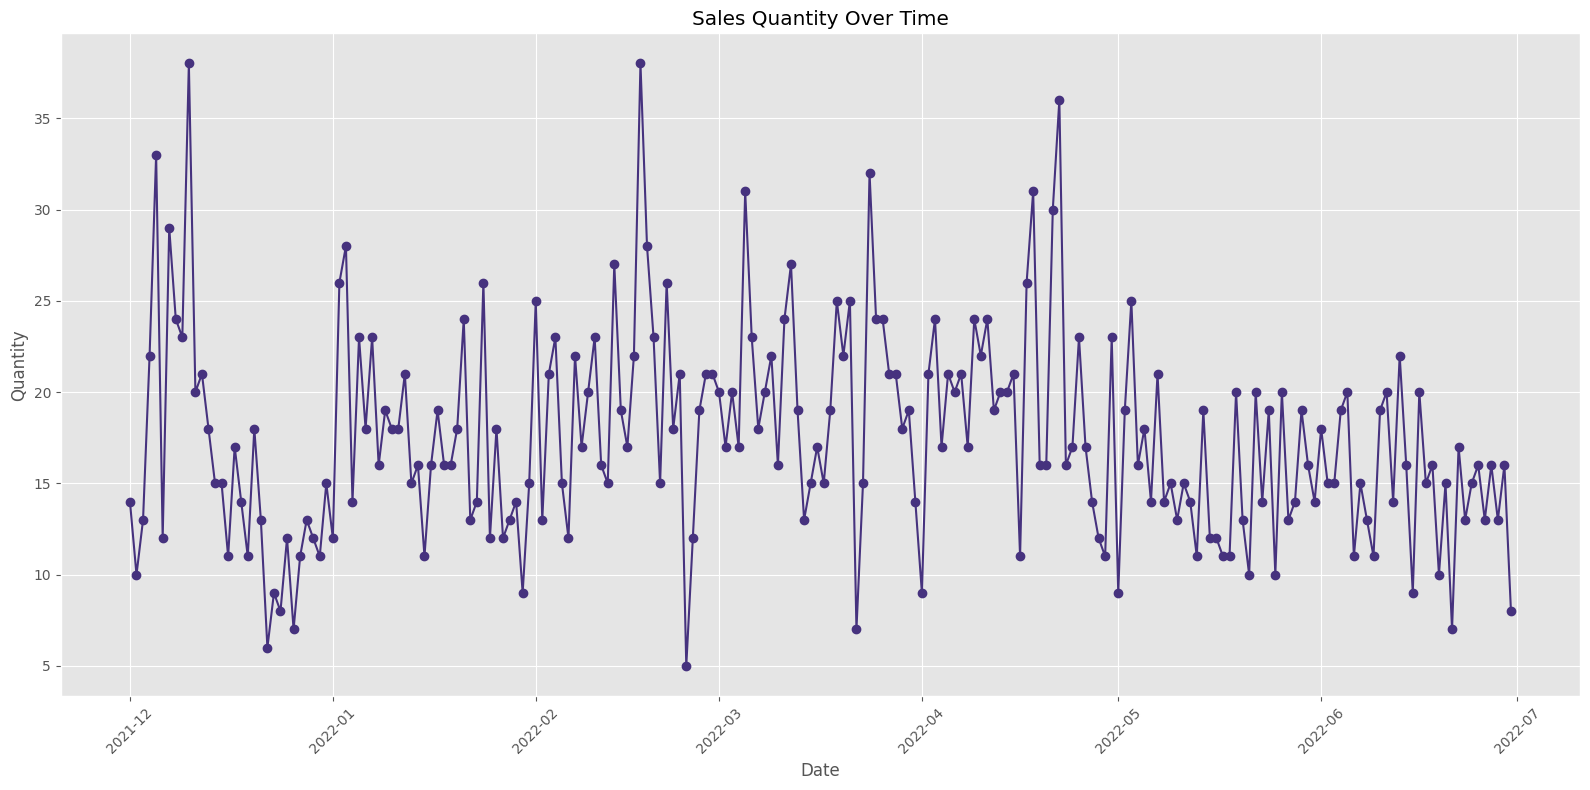

In [ ]:
# Plotting the time series of sales quantity
plt.figure(figsize=(16, 8))
plt.plot(merged_data['Day Index'], merged_data['Quantity'], label='Quantity', marker='o')
plt.title('Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation:
- **Time Series Plot**: Visualizes trends, seasonal patterns, and potential anomalies in the sales data.


## Line Plot: Clicks, Quantity, and Impressions Over Weekends

### Objective:
This line plot visualizes how `Clicks`, `Quantity`, and `Impressions` vary specifically over weekends. By focusing on weekends, we can analyze user behavior and performance metrics during non-working days.


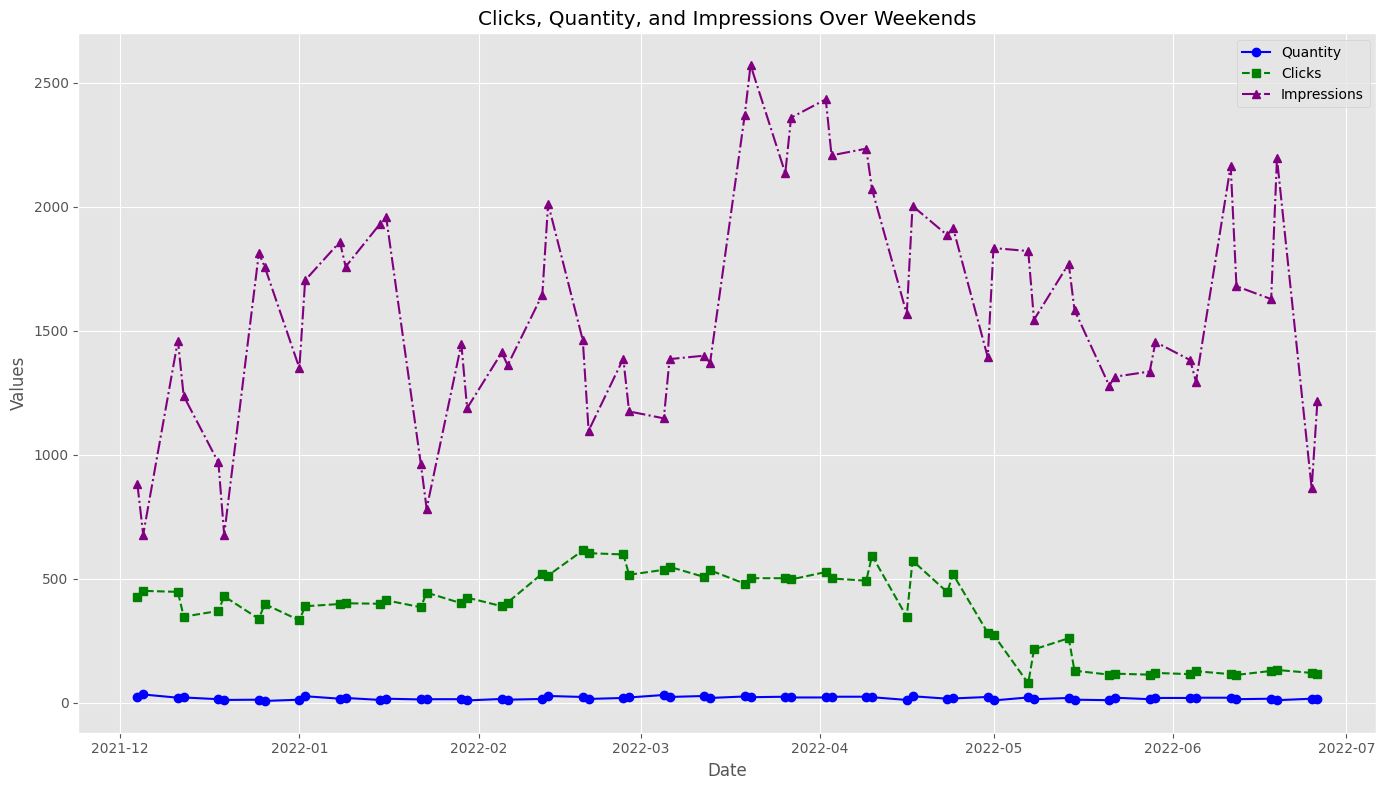

In [ ]:
import matplotlib.pyplot as plt

# Aggregating data over weekends
weekend_data = merged_data[merged_data['Weekend'] == 1].groupby('Day Index').sum()

# Plotting clicks, quantity, and impressions over weekends
plt.figure(figsize=(14, 8))

# Line for Quantity
plt.plot(weekend_data.index, weekend_data['Quantity'], label='Quantity', marker='o', linestyle='-', color='blue')

# Line for Clicks
plt.plot(weekend_data.index, weekend_data['Clicks'], label='Clicks', marker='s', linestyle='--', color='green')

# Line for Impressions
plt.plot(weekend_data.index, weekend_data['Impressions'], label='Impressions', marker='^', linestyle='-.', color='purple')

# Adding plot details
plt.title('Clicks, Quantity, and Impressions Over Weekends')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Process:
1. **Filter Weekend Data**:
   - Data is filtered to include only rows where the `Weekend` column is `1`.
   - Aggregated values for `Clicks`, `Quantity`, and `Impressions` are computed for each weekend.

2. **Line Plot**:
   - Separate lines for each metric (`Clicks`, `Quantity`, and `Impressions`) are plotted to show their trends over weekends.
   - Markers and line styles are used to visually distinguish between the metrics.


## Pie Charts: Time-Based Sales Distribution

### Objective:
The pie charts provide a clear visual representation of sales (`Quantity`) distribution across different time periods. This analysis helps identify seasonal trends, high-performing periods, and variations in sales.


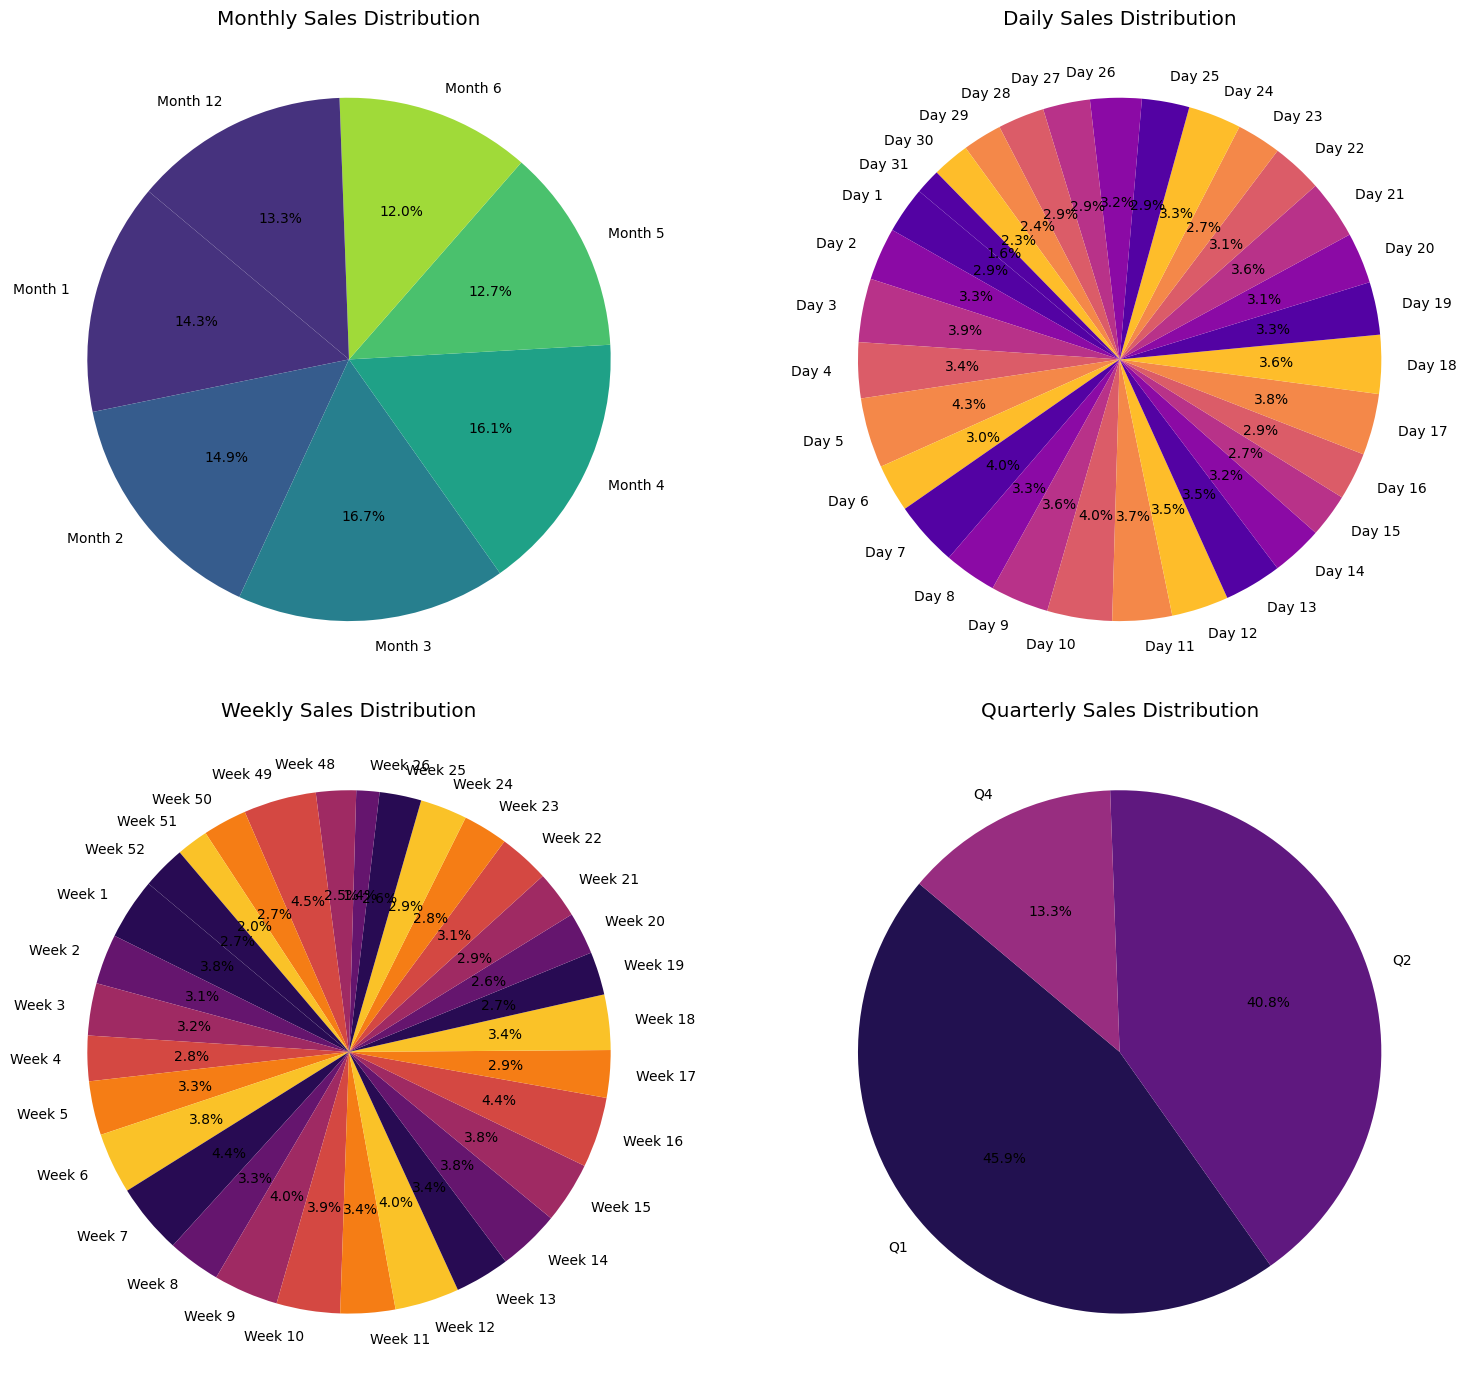

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Day Index' column is in datetime format
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Create time-based columns if they don't exist
merged_data['Month'] = merged_data['Day Index'].dt.month
merged_data['Day'] = merged_data['Day Index'].dt.day
merged_data['Week'] = merged_data['Day Index'].dt.isocalendar().week
merged_data['Quarter'] = merged_data['Day Index'].dt.quarter

# Grouping data by Month, Day, Week, and Quarter, and calculating total sales (Quantity)
monthly_sales = merged_data.groupby('Month')['Quantity'].sum()
daily_sales = merged_data.groupby('Day')['Quantity'].sum()
weekly_sales = merged_data.groupby('Week')['Quantity'].sum()
quarterly_sales = merged_data.groupby('Quarter')['Quantity'].sum()

# Plotting pie charts for each time-based sales distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Monthly Sales Distribution
axes[0, 0].pie(monthly_sales, labels=[f'Month {m}' for m in monthly_sales.index], autopct='%1.1f%%',
               startangle=140, colors=sns.color_palette('viridis'))
axes[0, 0].set_title('Monthly Sales Distribution')

# Daily Sales Distribution
axes[0, 1].pie(daily_sales, labels=[f'Day {d}' for d in daily_sales.index], autopct='%1.1f%%',
               startangle=140, colors=sns.color_palette('plasma'))
axes[0, 1].set_title('Daily Sales Distribution')

# Weekly Sales Distribution
axes[1, 0].pie(weekly_sales, labels=[f'Week {w}' for w in weekly_sales.index], autopct='%1.1f%%',
               startangle=140, colors=sns.color_palette('inferno'))
axes[1, 0].set_title('Weekly Sales Distribution')

# Quarterly Sales Distribution
axes[1, 1].pie(quarterly_sales, labels=[f'Q{q}' for q in quarterly_sales.index], autopct='%1.1f%%',
               startangle=140, colors=sns.color_palette('magma'))
axes[1, 1].set_title('Quarterly Sales Distribution')

# Adjusting layout for better display
plt.tight_layout()
plt.show()



### Explanation of Pie Charts:
1. **Monthly Sales Distribution**:
   - Displays the total sales for each month.
   - Helps in identifying which months contribute most to overall sales and uncovering potential seasonality or peak demand periods.

2. **Daily Sales Distribution**:
   - Shows the total sales for each day of the month.
   - Useful for understanding day-level sales patterns and identifying specific days with high or low activity.

3. **Weekly Sales Distribution**:
   - Aggregates sales at the weekly level.
   - Highlights the weeks with the highest or lowest sales performance.

4. **Quarterly Sales Distribution**:
   - Summarizes sales over the four quarters of the year.
   - Useful for high-level analysis of sales trends across quarters.

## Scatter Plot Analysis: Exploring Relationships Between Key Metrics

### Objective:
Scatter plots are used to visually explore the relationships between `Clicks`, `Quantity`, and `Impressions`. These visualizations help identify trends, correlations, and patterns between variables.


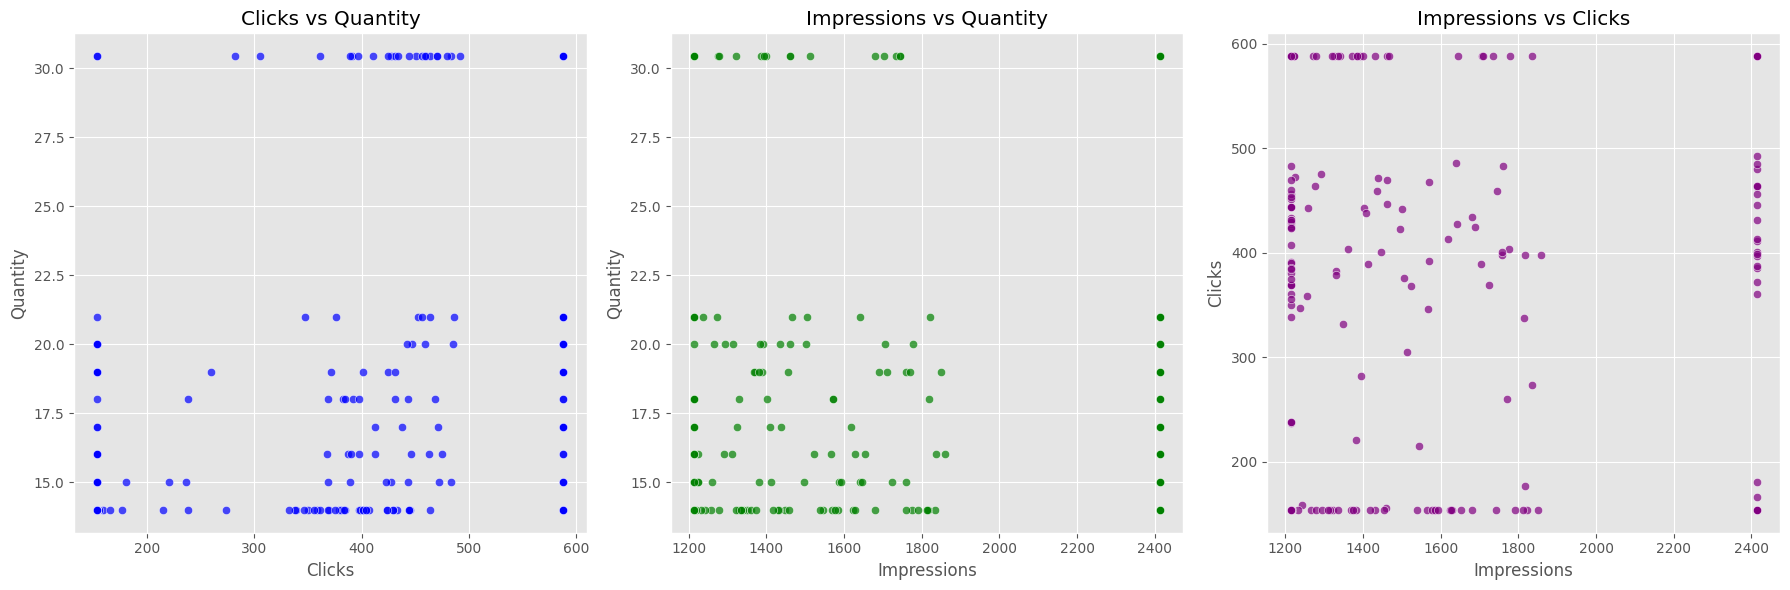

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size
plt.figure(figsize=(18, 6))

# Scatter plot: Clicks vs Quantity
plt.subplot(1, 3, 1)
sns.scatterplot(data=merged_data, x='Clicks', y='Quantity', color='blue', alpha=0.7)
plt.title('Clicks vs Quantity')
plt.xlabel('Clicks')
plt.ylabel('Quantity')

# Scatter plot: Impressions vs Quantity
plt.subplot(1, 3, 2)
sns.scatterplot(data=merged_data, x='Impressions', y='Quantity', color='green', alpha=0.7)
plt.title('Impressions vs Quantity')
plt.xlabel('Impressions')
plt.ylabel('Quantity')

# Scatter plot: Impressions vs Clicks
plt.subplot(1, 3, 3)
sns.scatterplot(data=merged_data, x='Impressions', y='Clicks', color='purple', alpha=0.7)
plt.title('Impressions vs Clicks')
plt.xlabel('Impressions')
plt.ylabel('Clicks')

# Adjust layout
plt.tight_layout()
plt.show()


### Plots:
1. **Clicks vs Quantity**:
   - Shows whether an increase in clicks correlates with higher sales quantity.
   - Insights from this plot can determine how effectively user engagement translates into sales.

2. **Impressions vs Quantity**:
   - Explores whether more ad impressions lead to higher sales quantities.
   - Helps evaluate the effectiveness of ad visibility in driving sales.

3. **Impressions vs Clicks**:
   - Examines whether more ad impressions result in higher user engagement (clicks).
   - Provides insights into the click-through rate and ad performance.


## Correlation Heatmap: Numeric Features

### Objective:
The correlation heatmap visualizes the relationships between numeric features in the dataset. It provides insights into how different metrics, such as `Clicks`, `Quantity`, `Impressions`, and time-based features, are interrelated.


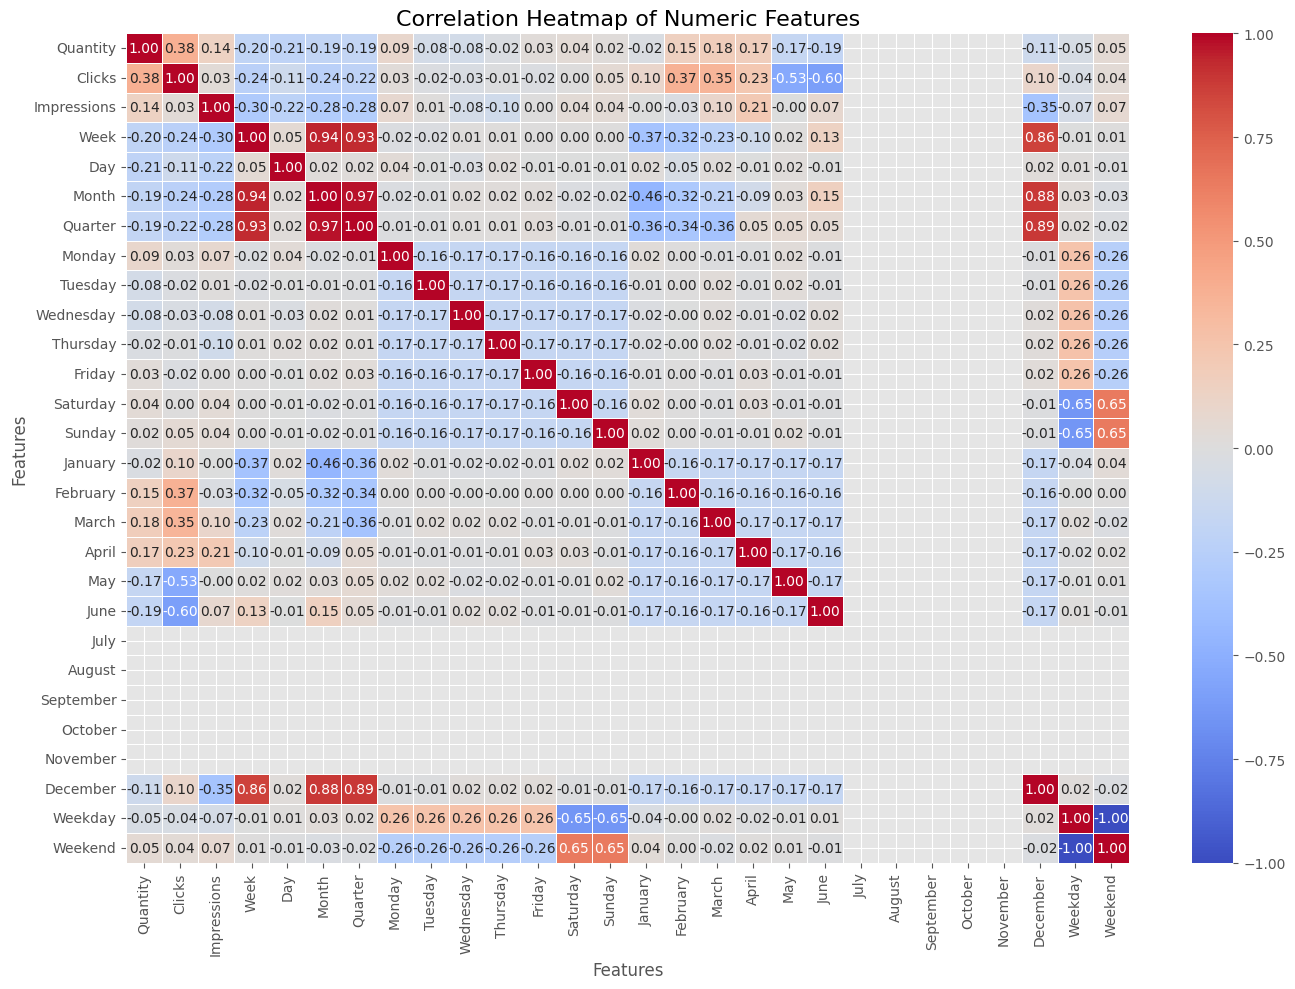

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns for correlation analysis
numeric_columns = merged_data.select_dtypes(include=['number'])

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding titles and labels
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



### Key Details:
- **Positive Correlation**:
  - Represented by values close to `+1` (e.g., `0.8` or higher).
  - Indicates that as one feature increases, the other tends to increase.
- **Negative Correlation**:
  - Represented by values close to `-1` (e.g., `-0.8` or lower).
  - Indicates that as one feature increases, the other tends to decrease.
- **Weak or No Correlation**:
  - Represented by values close to `0`.
  - Suggests no significant linear relationship between the features.


## Statistical Summaries of Numeric Features

### Objective:
Statistical summaries provide an overview of key metrics for each numeric feature, helping to understand the dataset's central tendencies and variability.


In [ ]:
# Displaying statistical summaries for numeric columns
numeric_summary = merged_data.describe()

# Transpose the summary for better readability
print("Statistical Summary of Numeric Features:")
print(numeric_summary.transpose())


Statistical Summary of Numeric Features:
             count                 mean                  min  \
Day Index      212  2022-03-16 12:00:00  2021-12-01 00:00:00   
Quantity     212.0            17.542453                  5.0   
Clicks       212.0            358.20283                 60.0   
Impressions  212.0           1531.70283                620.0   
Week         212.0            19.023585                  1.0   
Day          212.0            15.660377                  1.0   
Month        212.0                 4.75                  1.0   
Quarter      212.0             1.867925                  1.0   
Monday       212.0             0.141509                  0.0   
Tuesday      212.0             0.141509                  0.0   
Wednesday    212.0             0.146226                  0.0   
Thursday     212.0             0.146226                  0.0   
Friday       212.0             0.141509                  0.0   
Saturday     212.0             0.141509                  0.0   

### Key Metrics:
1. **Count**:
   - The number of non-missing values for each feature.
   - Helps identify missing data issues.
2. **Mean**:
   - The average value for each feature.
   - Provides a measure of central tendency.
3. **Standard Deviation (Std)**:
   - Indicates how much the data varies from the mean.
   - Higher values suggest greater variability.
4. **Minimum (Min) and Maximum (Max)**:
   - Define the range of values for each feature.
   - Useful for detecting outliers or extreme values.
5. **Quartiles (25%, 50%, 75%)**:
   - The 25th, 50th (median), and 75th percentiles provide insights into the data distribution.
   - Compare the mean and median to identify skewness:
     - **Mean > Median**: Positively skewed distribution.
     - **Mean < Median**: Negatively skewed distribution.


## Conclusion
This comprehensive EDA and feature engineering process prepared the data for advanced predictive modeling. Key insights were drawn from the data through visualizations and detailed analysis. This notebook sets the stage for developing forecasting models to predict future sales trends.


## Time Series Forecasting: Model Development and Hyperparameter Tuning

### Project Overview

This project focuses on the development and evaluation of various time series forecasting models. The goal is to assess the effectiveness of different approaches—Auto-Regressive (AR), Moving Average (MA), ARIMA (Auto-Regressive Integrated Moving Average), SARIMA (Seasonal ARIMA), ARIMAX (ARIMA with Exogenous Variables), and SARIMAX (Seasonal ARIMAX with Exogenous Variables)—in predicting future values in time series data. Additionally, the project explores the impact of hyperparameter tuning using **Optuna** to optimize model configurations and improve predictive accuracy.

### Objective

The main objectives of this project are:
1. To evaluate the performance of various time series forecasting models (AR, MA, ARIMA, SARIMA, ARIMAX, and SARIMAX).
2. To apply hyperparameter tuning using **Optuna** to improve model accuracy.
3. To compare the models' performance before and after hyperparameter tuning using standard evaluation metrics (MAE, RMSE, MSE, and MAPE).
4. To identify the best-performing model for future predictions and demonstrate the impact of tuning on model performance.

### Dataset and Features

The dataset used for this project consists of time series data with a monthly frequency. Exogenous variables (external factors) are included in the dataset, providing additional information to improve forecasting accuracy. The models were evaluated based on their ability to forecast future values while considering seasonality, trends, and external variables.

### Approach

1. **Model Development**: Fit initial models (AR, MA, ARIMA, SARIMA, ARIMAX, SARIMAX) to the time series data.
2. **Hyperparameter Tuning**: Use **Optuna** to optimize the hyperparameters for each model, enhancing the models' performance.
3. **Evaluation**: Assess the models' performance using standard metrics such as MAE, RMSE, MSE, and MAPE before and after tuning.
4. **Comparison**: Compare the results to identify the most accurate model and analyze the effects of hyperparameter tuning.

This document outlines the methodology, results, and conclusions of the project, along with the final evaluation of the best-performing model.


In [1]:
# Load the dataset
import pandas as pd

# Replace with your file path if running locally
file_path = '/content/FINAL_DATASET.xlsx'
masterdata = pd.read_excel(file_path)

# Display the first few rows to understand the data
print(masterdata.head())


   Quantity  Impressions  Clicks  Imputed_Quantity  Log_quantity  Log_clicks  \
0        14          620     445             14.00      2.708050    6.100319   
1        10          890     433             10.00      2.397895    6.073045   
2        13          851     424             13.00      2.639057    6.052089   
3        22          881     427             22.00      3.135494    6.059123   
4        33          678     451             30.67      3.526361    6.113682   

   Log_impressions YearMonth Monthname  Dayofweek  ...  April  May  June  \
0         6.431331   2021-12  December  Wednesday  ...      0    0     0   
1         6.792344   2021-12  December   Thursday  ...      0    0     0   
2         6.747587   2021-12  December     Friday  ...      0    0     0   
3         6.782192   2021-12  December   Saturday  ...      0    0     0   
4         6.520621   2021-12  December     Sunday  ...      0    0     0   

   July  August  September  October  November  December  Categ

###Check for Stationarity
We use the Augmented Dickey-Fuller (ADF) Test to check if the time series is stationary.

In [2]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def check_stationarity(series):
    """
    Perform Augmented Dickey-Fuller test to check stationarity of a time series.
    """
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary. Consider differencing.")
    return result[1] < 0.05  # Returns True if stationary

# Check stationarity of the 'imputed_Quantity' column
is_stationary = check_stationarity(masterdata['Imputed_Quantity'])



ADF Statistic: -4.372460988868511
p-value: 0.0003319752426367818
The series is stationary.


###Perform Differencing (If Required)
If the series is non-stationary, perform differencing to remove trends.

In [13]:
import matplotlib.pyplot as plt
# Perform differencing if the series is non-stationary
if not is_stationary:
    masterdata['Differenced_Quantity'] = masterdata['imputed_Quantity'].diff().dropna()
    print("Differencing applied to make the series stationary.")
else:
    masterdata['Differenced_Quantity'] = masterdata['Imputed_Quantity']


###Time Series Decomposition
Decompose your imputed_Quantity time series to analyze its components: trend, seasonality, and residuals.

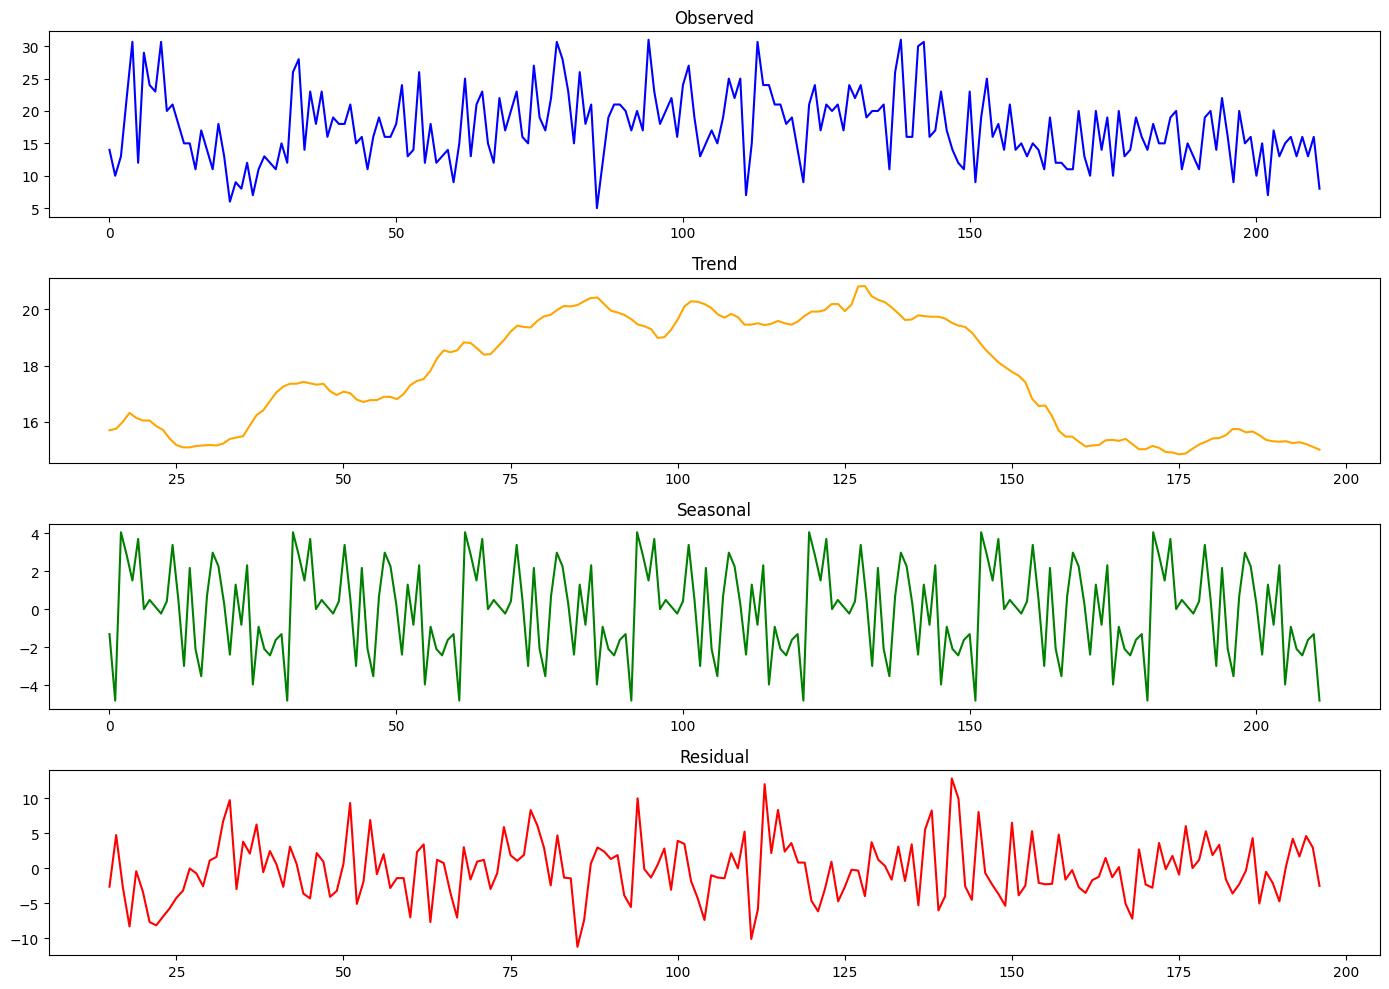

In [12]:
# Ensure the data is sorted by date
masterdata.sort_index(inplace=True)

# Select the time series column
series = masterdata['Imputed_Quantity']

# Decompose the time series
decomposition = seasonal_decompose(series, model='additive', period=30)  # Adjust period if necessary

# Plot the decomposition
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual')

plt.tight_layout()
plt.show()


###Train-Test Split
We split the data into training and testing sets for both target and exogenous variables.

In [14]:
# Define train-test split (70%-30%)
train_size = int(0.7 * len(masterdata))

# Define train and test datasets for the target variable
train_target = masterdata['Imputed_Quantity'][:train_size]
test_target = masterdata['Imputed_Quantity'][train_size:]

# Define train and test datasets for exogenous variables (if required later)
exogenous_vars = ['Impressions', 'Clicks', 'Month_numeric', 'Weekofmonth',
                  'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
train_exog = masterdata[exogenous_vars][:train_size]
test_exog = masterdata[exogenous_vars][train_size:]